In [17]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [18]:
os.makedirs('temp')
urls={"horse-or-human.zip":"horse-or-human","validation-horse-or-human.zip":"validation-horse-or-human"}
for link,path in urls.items():
    with requests.get(f"https://storage.googleapis.com/learning-datasets/{link}",stream=True) as r:
        r.raise_for_status()
        with open(f'./temp/{link}','wb') as f:
            f.write(r.content)
        local_zip =f'./temp/{link}'
        zip_ref=zipfile.ZipFile(local_zip,'r')
        zip_ref.extractall(f'./temp/{path}')
        zip_ref.close()
    

print('Download conclude')

Download conclude


In [19]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(300,300,3)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
TRAINING_DIR = './temp/horse-or-human/'
VALIDATION_DIR = './temp/validation-horse-or-human/'
training_datagen = ImageDataGenerator(rescale=1./255 ) #ImageDataGenerator trate the image possibiliting automatic adjustments, such as normalization (rescaling), centering and standardization of data.
validation_datagen = ImageDataGenerator(rescale=1./255)


In [22]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(300,300),batch_size=128,class_mode='binary') # application the training on directori
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
history = model.fit(
      training_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=8)

c:\Users\mbern\OneDrive\Área de Trabalho\tensorflow\tensorflowCourse\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
8/8 - 60s - 7s/step - accuracy: 0.5406 - loss: 1.0614 - val_accuracy: 0.5000 - val_loss: 0.6895
Epoch 2/25
8/8 - 3s - 421ms/step - accuracy: 0.5391 - loss: 0.6738
Epoch 3/25
8/8 - 28s - 4s/step - accuracy: 0.5717 - loss: 0.6794 - val_accuracy: 0.5000 - val_loss: 0.6739
Epoch 4/25
8/8 - 5s - 579ms/step - accuracy: 0.6172 - loss: 0.6549
Epoch 5/25
8/8 - 34s - 4s/step - accuracy: 0.6240 - loss: 0.6591 - val_accuracy: 0.5000 - val_loss: 0.6368
Epoch 6/25
8/8 - 3s - 404ms/step - accuracy: 0.5000 - loss: 0.7675
Epoch 7/25
8/8 - 27s - 3s/step - accuracy: 0.6485 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 8/25
8/8 - 3s - 345ms/step - accuracy: 0.5625 - loss: 0.6210
Epoch 9/25
8/8 - 22s - 3s/step - accuracy: 0.7842 - loss: 0.4976 - val_accuracy: 0.7227 - val_loss: 0.6600
Epoch 10/25
8/8 - 2s - 299ms/step - accuracy: 0.8516 - loss: 0.3666
Epoch 11/25
8/8 - 22s - 3s/step - accuracy: 0.8899 - loss: 0.2909 - val_accuracy: 0.5742 - val_loss: 3.5104
Epoch 12/25
8/8 - 2s 

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,408,196 (13.00 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,704,099 (6.50 MB)

In [25]:
import  numpy as np
from keras.preprocessing import image

In [26]:
img = image.load_img('horse.jpeg',target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is a human")
else:
    print(" is a horse")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
[0.]
 is a horse


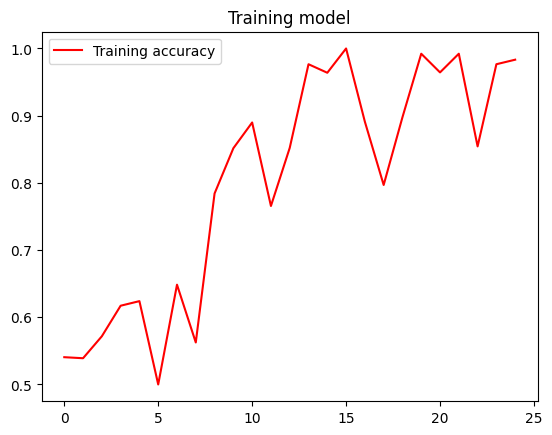

In [27]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.title('Training model')
plt.legend(loc=0)
plt.show()


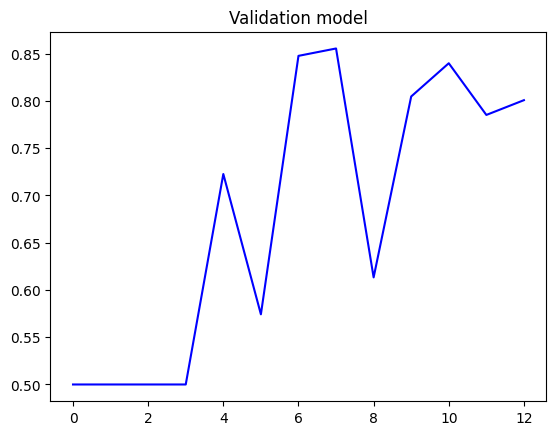

In [28]:
epochs = range(len(val_acc))
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Validation model')
plt.show()